## Bank Portfolio

### Invest in Bank Stocks

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime as dt

import warnings 
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [25]:
tickers = ["CBA.AX", "BAC", "WFC", "C"]
end = "2023-03-03"
start = "2010-01-01"

df = yf.download(ticker, start, end)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [26]:
df.head()

,BAC,C,CBA.AX,WFC
Date,,,,
2010-01-04,13.080586,27.860683,27.287273,19.372580
2010-01-05,13.505774,28.925943,27.700035,19.904408
2010-01-06,13.664169,29.827314,27.839277,19.932774
2010-01-07,14.114366,29.909260,27.570738,20.656052
2010-01-08,13.989309,29.417608,27.928797,20.464594


In [27]:
df.tail()

,BAC,C,CBA.AX,WFC
Date,,,,
2023-02-24,33.989548,50.180000,101.220001,46.619999
2023-02-27,33.989548,50.470001,101.389999,46.779999
2023-02-28,34.078968,50.689999,100.690002,46.770000
2023-03-01,33.919998,51.500000,99.050003,46.680000
2023-03-02,33.490002,51.400002,97.070000,45.799999


In [24]:
# Know the time horizon 
from dateutil import relativedelta

d1 = dt.strptime(start, "%Y-%m-%d")
d2 = dt.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2, d1)
print("How many years have your invested?")
print("%s years" % delta.years)

How many years have your invested?
13 years


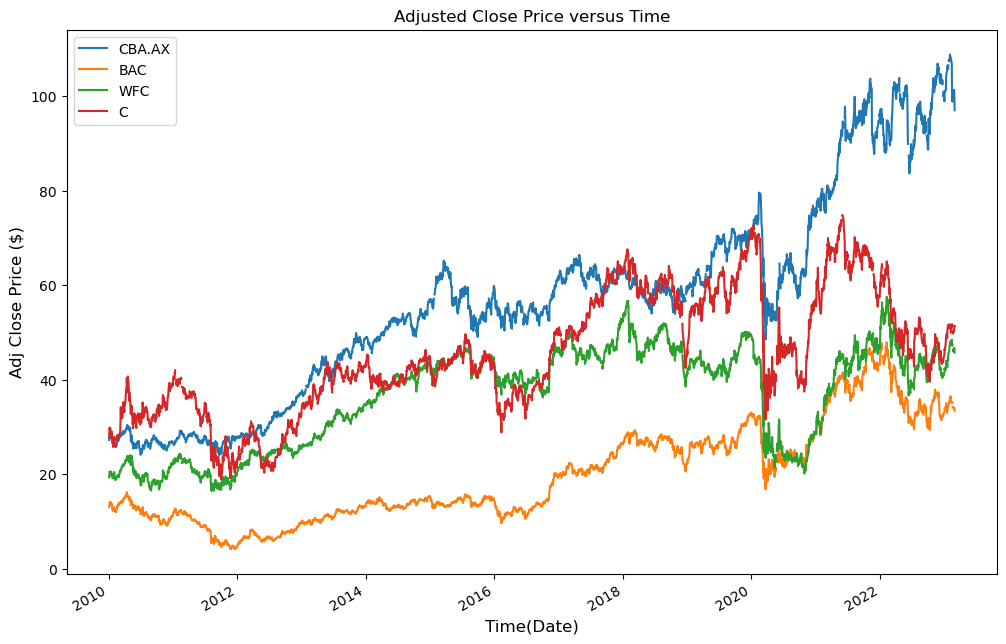

In [79]:
for ticker in tickers: 
    df[ticker].plot(label=ticker, figsize=(12, 8))
plt.title("Adjusted Close Price versus Time", fontsize=12)
plt.xlabel("Time(Date)", fontsize = 12)
plt.ylabel("Adj Close Price ($)", fontsize = 12)
plt.legend(loc="upper left")
plt.show()


In [29]:
for ticker in tickers:
    print(ticker + ":", df[ticker].max())

CBA.AX: 108.85079956054688
BAC: 47.94542694091797
WFC: 57.59666442871094
C: 74.91751861572266


In [30]:
for ticker in tickers:
    print(ticker + ":", df[ticker].min())

CBA.AX: 24.083812713623047
BAC: 4.1924519538879395
WFC: 16.538497924804688
C: 18.946693420410156


In [39]:
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker + "Return"] = np.log(1 + df[ticker]/df[ticker].shift(1) -1).dropna()
returns.head()

,CBA.AXReturn,BACReturn,WFCReturn,CReturn
Date,,,,
2010-01-05,0.015013,0.031988,0.027083,0.037522
2010-01-06,0.005014,0.011660,0.001424,0.030686
2010-01-07,-0.009693,0.032416,0.035643,0.002744
2010-01-08,0.012903,-0.008900,-0.009312,-0.016575
2010-01-11,0.007274,0.008900,-0.002081,0.011081


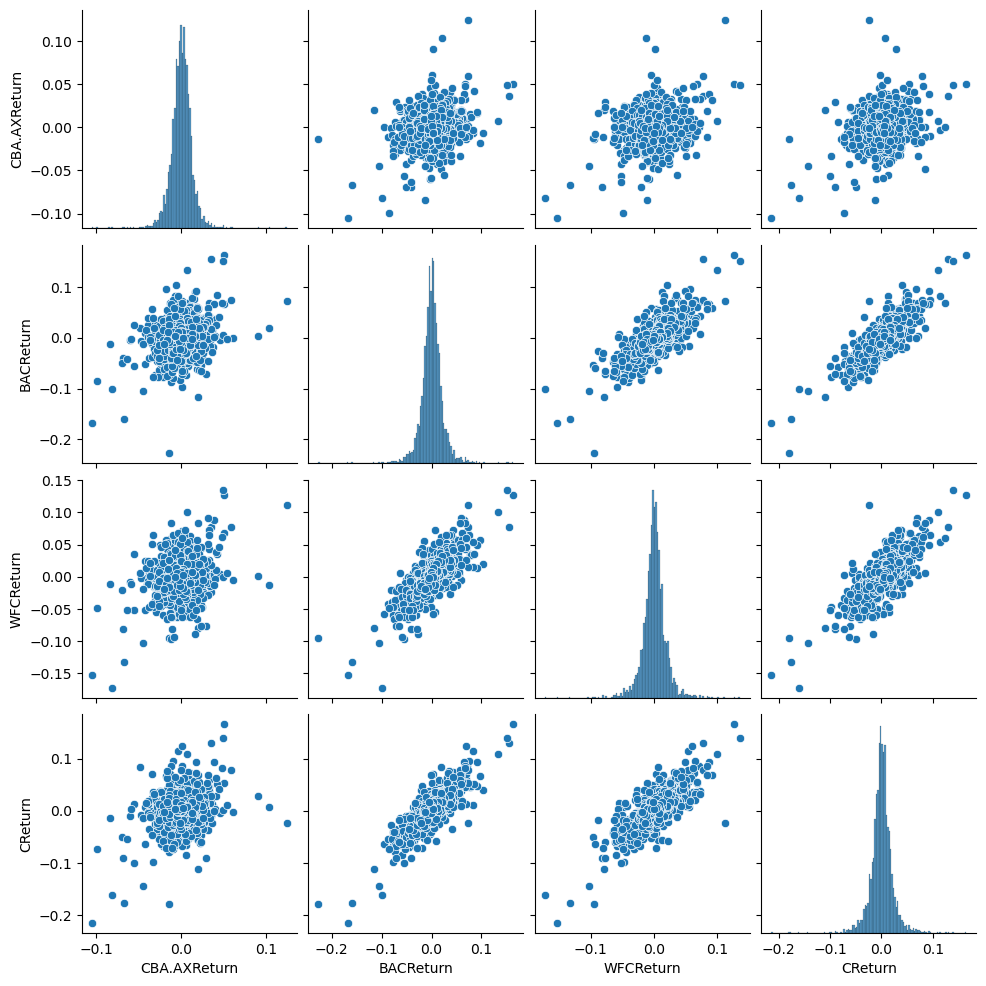

In [40]:
sns.pairplot(returns[1:])

In [42]:
# Dates each bank stock had the best and worst single days returns.

print("Best Day Returns")
print("-" * 25)
print(returns.idxmax())
print("\n")
print("Worst Day Returns")
print("-" * 25)
print(returns.idxmin())

Best Day Returns
-------------------------
CBA.AXReturn   2020-03-17
BACReturn      2020-03-13
WFCReturn      2020-03-24
CReturn        2020-03-13
dtype: datetime64[ns]


Worst Day Returns
-------------------------
CBA.AXReturn   2020-03-16
BACReturn      2011-08-08
WFCReturn      2020-03-12
CReturn        2020-03-16
dtype: datetime64[ns]


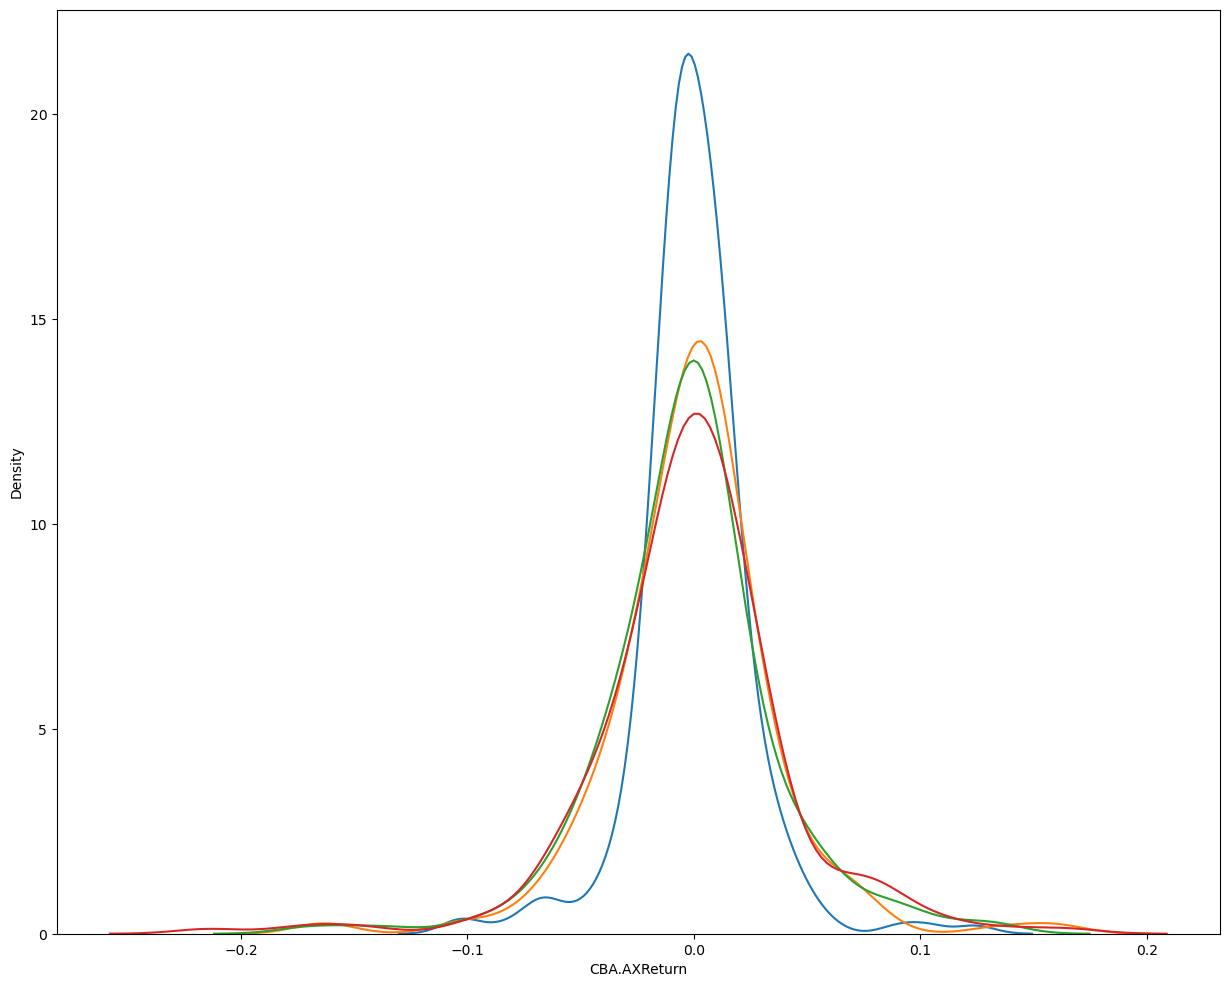

In [49]:
plt.figure(figsize=(15, 12))

for r in returns:
    sns.kdeplot(returns.loc["2020-01-01" : "2020-12-31"][r])

In [54]:
returns.corr()

,CBA.AXReturn,BACReturn,WFCReturn,CReturn
CBA.AXReturn,1.000000,0.224939,0.224337,0.242787
BACReturn,0.224939,1.000000,0.791471,0.852186
WFCReturn,0.224337,0.791471,1.000000,0.786227
CReturn,0.242787,0.852186,0.786227,1.000000


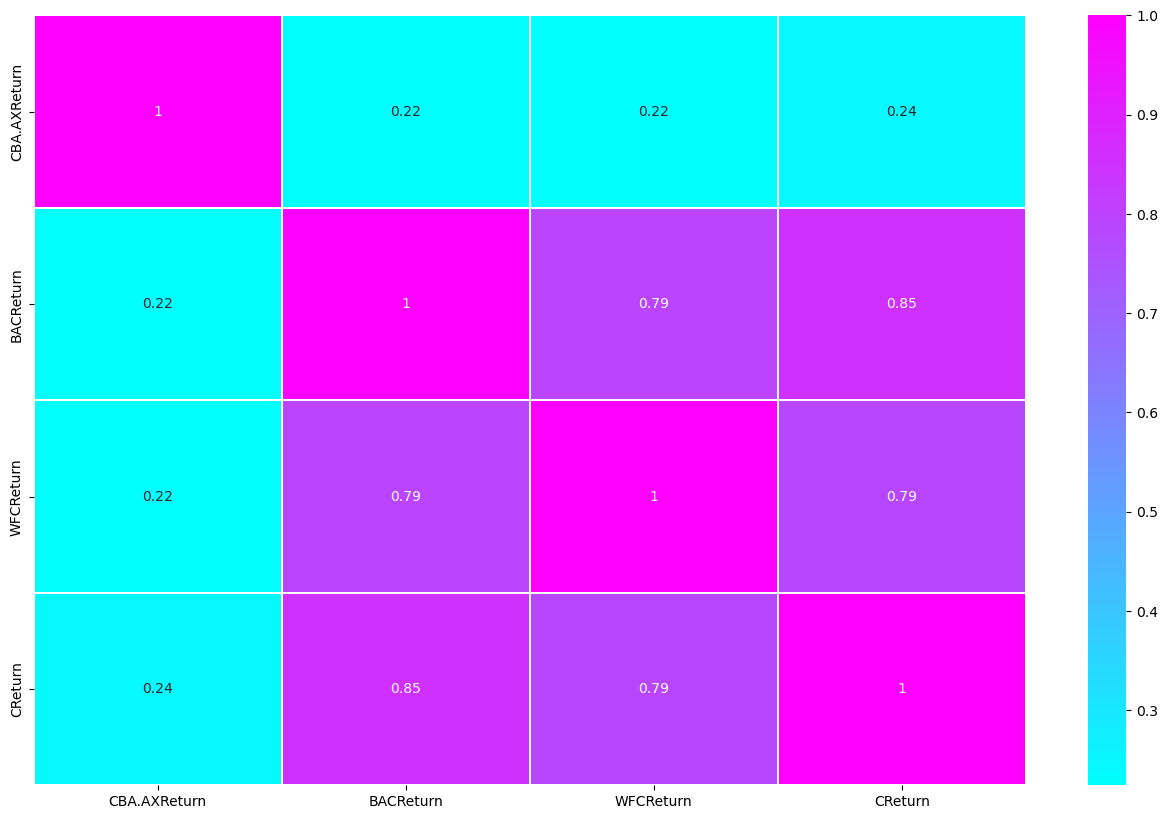

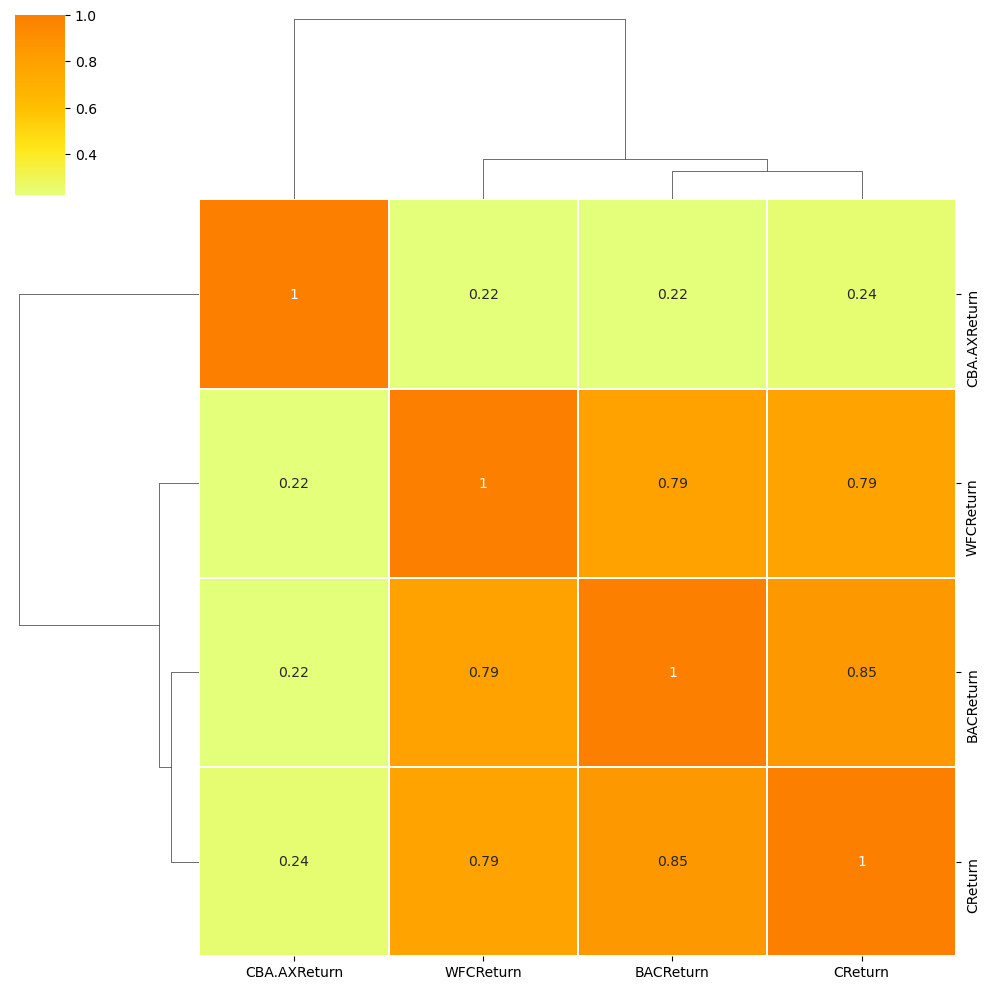

In [55]:
# Heatmap for returns of all the banks 
plt.figure(figsize = (16, 10))
sns.heatmap(returns.corr(), cmap = "cool", linewidth=0.1, annot=True)
sns.clustermap(returns.corr(), cmap = "Wistia", linewidth=0.1, annot=True)

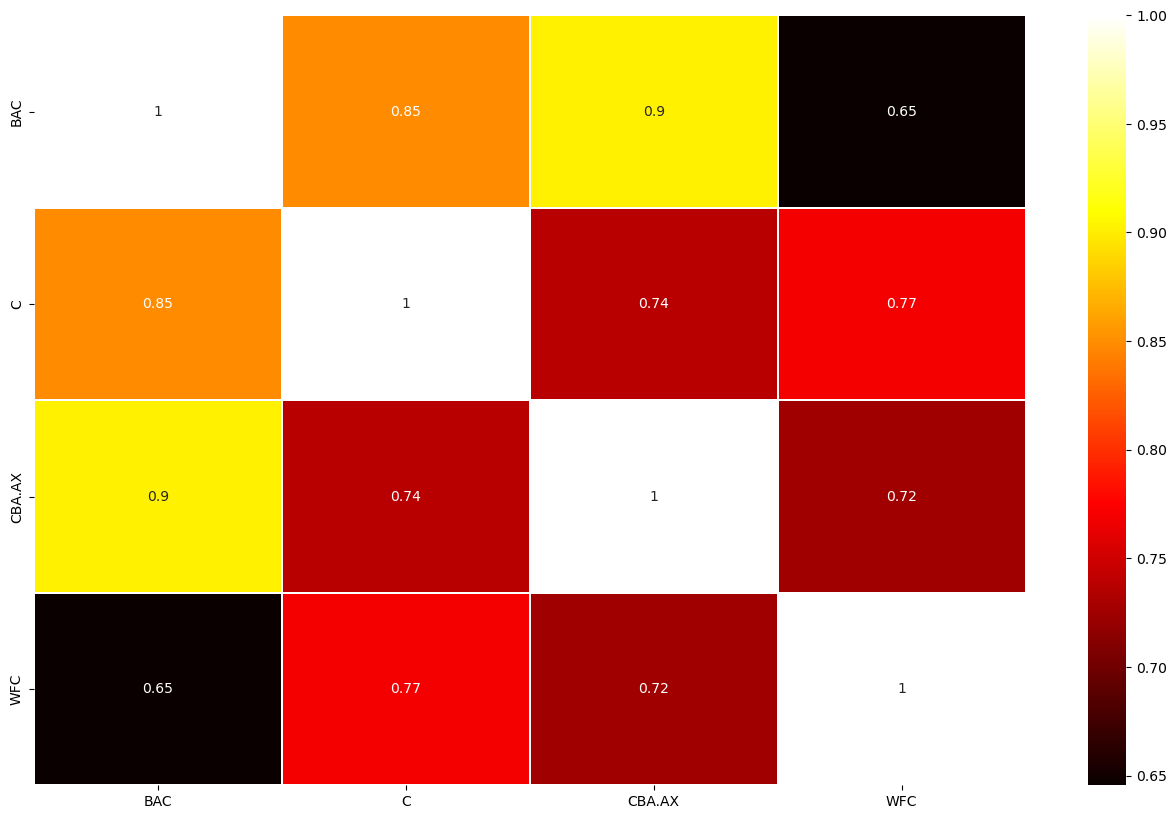

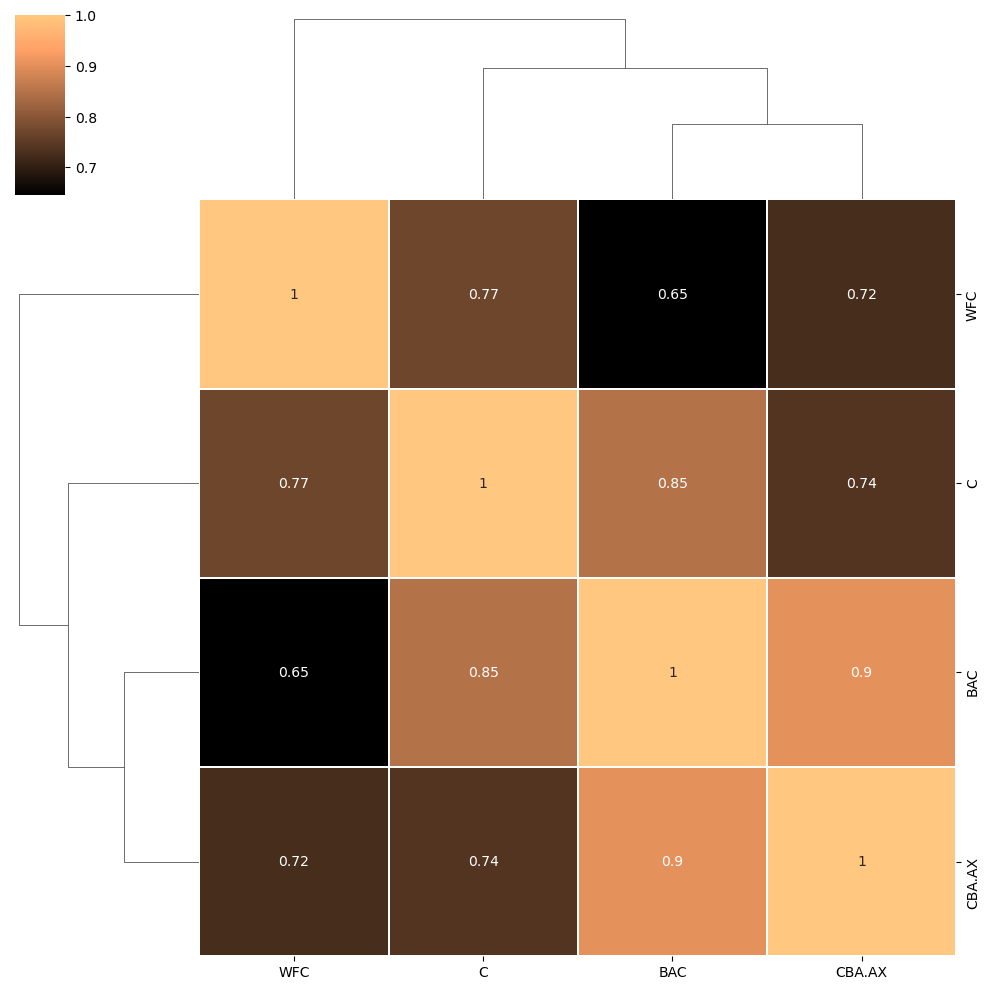

In [57]:
plt.figure(figsize =(16, 10))
sns.heatmap(df.corr(), cmap="hot", linewidths=0.1, annot=True)
sns.clustermap(df.corr(), cmap="copper", linewidths=0.1, annot=True)

In [75]:
Investment = 12000
print("Investment per Stock")
print("-" * 18)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x in zip(df.columns, invest_weights):
    cost = x * Investment
    print("{} : ${}".format(i, cost))

Investment per Stock
------------------
BAC : $3600.0
C : $3600.0
CBA.AX : $2400.0
WFC : $2400.0


In [74]:
print("Number of Shares")
print("-" * 18)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x,y in zip(df.columns, invest_weights, df.iloc[0]):
    cost = x * Investment 
    shares = int(cost/y)
    print("{} : {}".format(i, shares))

Number of Shares
------------------
BAC : 275
C : 129
CBA.AX : 87
WFC : 123


In [73]:
print("Beginning Value")
print("-" * 18)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x,y in zip(df.columns, invest_weights, df.iloc[0]):
    cost = x * Investment 
    shares = int(cost/y)
    Beginning_Value = round(shares * y, 2)
    print("{} : ${}".format(i, Beginning_Value))


Beginning Value
------------------
BAC : $3597.16
C : $3594.03
CBA.AX : $2373.99
WFC : $2382.83


In [72]:
print("Current Value")
print("-" * 18)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x,y, z in zip(df.columns, invest_weights, df.iloc[0], df.iloc[-1]):
    cost = x * Investment 
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print("{} : ${}".format(i, Current_Value))


Current Value
------------------
BAC : $9209.75
C : $6630.6
CBA.AX : $8445.09
WFC : $5633.4


In [78]:
result = []
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x,y, z in zip(df.columns, invest_weights, df.iloc[0], df.iloc[-1]):
    cost = x * Investment 
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print("Total Value: $%s" % round(sum(result), 2))

Total Value: $29918.84
